In [12]:
import warnings 
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:\\Users\\sidda\\OneDrive\\Desktop\\SIH v2\\Set\\Base-v2.csv')
np.random.seed(42)

desired_min = 0.55
desired_max = 0.65

In [14]:
def adjust_outcomes(group):
    current_rate = group['DELIVERY OUTCOME'].mean()
    n = len(group)
    
    if current_rate < desired_min or current_rate > desired_max:
        # Calculate the number of successes needed to achieve a desired success rate
        desired_successes = int(np.round(np.random.uniform(desired_min, desired_max) * n))
        actual_successes = group['DELIVERY OUTCOME'].sum()
        
        if actual_successes < desired_successes:
            # Increase the number of successes
            difference = desired_successes - actual_successes
            indices_to_change = group[group['DELIVERY OUTCOME'] == 0].sample(n=difference).index
            group.loc[indices_to_change, 'DELIVERY OUTCOME'] = 1
        elif actual_successes > desired_successes:
            # Decrease the number of successes
            difference = actual_successes - desired_successes
            indices_to_change = group[group['DELIVERY OUTCOME'] == 1].sample(n=difference).index
            group.loc[indices_to_change, 'DELIVERY OUTCOME'] = 0
            
    return group


data.reset_index(drop=True, inplace=True)


data = data.groupby('RECEIVER REGION').apply(adjust_outcomes).reset_index(drop=True)


new_success_rate = data.groupby('RECEIVER REGION')['DELIVERY OUTCOME'].mean().reset_index()
new_success_rate.columns = ['Region', 'New Success Rate']

print(new_success_rate)

              Region  New Success Rate
0  Bangalore Central          0.587598
1     Bangalore East          0.646497
2    Bangalore North          0.570846
3    Bangalore South          0.615463


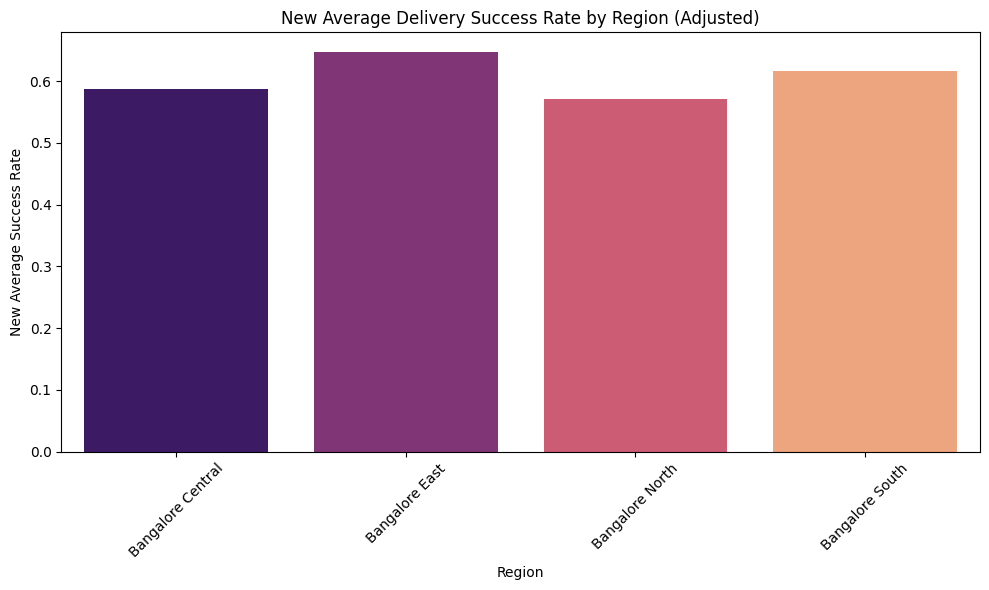

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.barplot(data=new_success_rate, x='Region', y='New Success Rate', palette='magma')

plt.title('New Average Delivery Success Rate by Region (Adjusted)')
plt.xlabel('Region')
plt.ylabel('New Average Success Rate')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


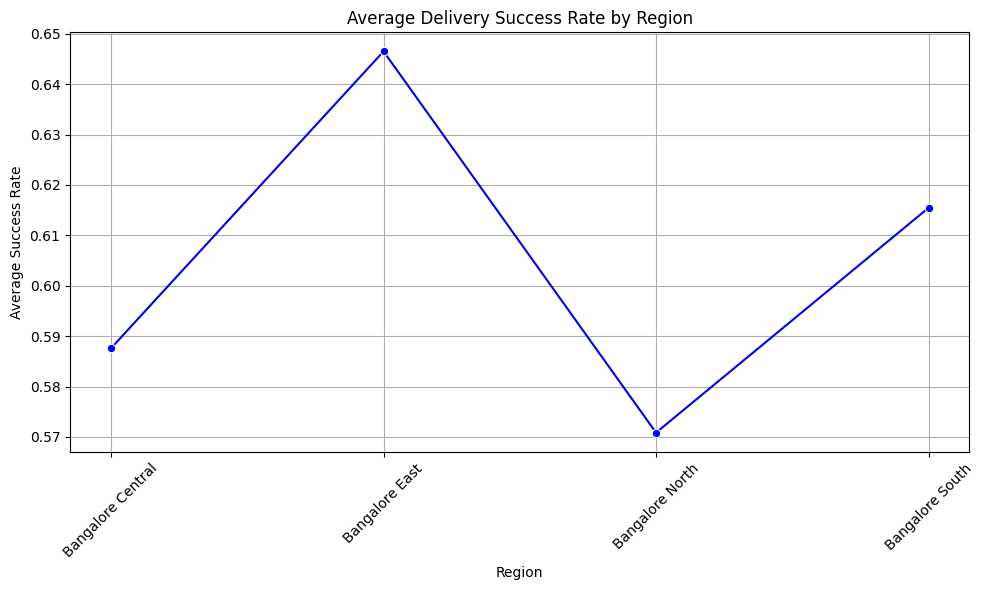

In [17]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=new_success_rate, x='Region', y='New Success Rate', marker='o', color='blue')

plt.title('Average Delivery Success Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Success Rate')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()